# Final Project - Disaster Tweets Analysis
## Part 1 - Setup and Preprocessing

In [1]:
!pip install pandas numpy matplotlib tensorflow setuptools

In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Collect data
!wget https://raw.githubusercontent.com/DavidUlloa6310/disaster_tweets/main/test.csv
!wget https://raw.githubusercontent.com/DavidUlloa6310/disaster_tweets/main/train.csv

--2024-04-19 23:41:20--  https://raw.githubusercontent.com/DavidUlloa6310/disaster_tweets/main/test.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 420783 (411K) [text/plain]
Saving to: ‘test.csv’

test.csv            100%[===================>] 410.92K  --.-KB/s    in 0.04s   

2024-04-19 23:41:21 (11.0 MB/s) - ‘test.csv’ saved [420783/420783]

--2024-04-19 23:41:21--  https://raw.githubusercontent.com/DavidUlloa6310/disaster_tweets/main/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 987712 (965K) [text/plain]
Savin

In [4]:
# Load data with pandas
train_data = pd.read_csv("./train.csv")
test_data = pd.read_csv("./test.csv")

display(train_data.head())

complete_x = np.array(train_data[["text"]])
complete_y = np.array(train_data[["target"]])

# Get Shape
shape = complete_x.shape
print(shape)

# Create a vector of indices and shuffle them
indices = np.arange(shape[0])
np.random.shuffle(indices)

cutoff_index = int(shape[0] * 0.80)

train_indices = indices[:cutoff_index]
val_indices = indices[cutoff_index:]

# Get training and validation data from the shuffled indices
train_X = complete_x[train_indices]
train_Y = complete_y[train_indices]
val_X = complete_x[val_indices]
val_Y = complete_y[val_indices]




,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


(7613, 1)


## Part 2 - Data Analysis

In [5]:
vectorize_layer = tf.keras.layers.TextVectorization(
    standardize="lower_and_strip_punctuation",
    split="whitespace",
    output_mode="int",
    max_tokens=200
)

vectorize_layer.adapt(complete_x)

display("--Vocabulary--")
for i, token in enumerate(vectorize_layer.get_vocabulary()):
  endline = '\n' if i % 10 == 0 else ''
  display(f"{i}: {token}  ")


'--Vocabulary--'

'0:   '

'1: [UNK]  '

'2: the  '

'3: a  '

'4: in  '

'5: to  '

'6: of  '

'7: and  '

'8: i  '

'9: is  '

'10: for  '

'11: on  '

'12: you  '

'13: my  '

'14: with  '

'15: it  '

'16: that  '

'17: at  '

'18: by  '

'19: this  '

'20: from  '

'21: be  '

'22: are  '

'23: was  '

'24: have  '

'25: like  '

'26: as  '

'27: me  '

'28: up  '

'29: just  '

'30: but  '

'31: so  '

'32: im  '

'33: amp  '

'34: not  '

'35: your  '

'36: out  '

'37: its  '

'38: after  '

'39: will  '

'40: all  '

'41: no  '

'42: fire  '

'43: an  '

'44: has  '

'45: when  '

'46: if  '

'47: we  '

'48: get  '

'49: new  '

'50: now  '

'51: via  '

'52: more  '

'53: about  '

'54: or  '

'55: what  '

'56: people  '

'57: one  '

'58: news  '

'59: he  '

'60: they  '

'61: how  '

'62: dont  '

'63: been  '

'64: over  '

'65: who  '

'66: into  '

'67: do  '

'68: were  '

'69: video  '

'70: us  '

'71: can  '

'72: 2  '

'73: emergency  '

'74: disaster  '

'75: there  '

'76: police  '

'77: than  '

'78: her  '

'79: would  '

'80: still  '

'81: some  '

'82: his  '

'83: body  '

'84: burning  '

'85: crash  '

'86: back  '

'87: storm  '

'88: california  '

'89: suicide  '

'90: why  '

'91: them  '

'92: off  '

'93: time  '

'94: know  '

'95: got  '

'96: had  '

'97: man  '

'98: buildings  '

'99: day  '

'100: rt  '

'101: first  '

'102: see  '

'103: world  '

'104: going  '

'105: bomb  '

'106: cant  '

'107: nuclear  '

'108: love  '

'109: fires  '

'110: our  '

'111: attack  '

'112: youtube  '

'113: two  '

'114: 3  '

'115: killed  '

'116: dead  '

'117: go  '

'118: their  '

'119: train  '

'120: full  '

'121: war  '

'122: car  '

'123: being  '

'124: only  '

'125: may  '

'126: families  '

'127: today  '

'128: life  '

'129: hiroshima  '

'130: good  '

'131: accident  '

'132: think  '

'133: down  '

'134: watch  '

'135: say  '

'136: many  '

'137: last  '

'138: here  '

'139: u  '

'140: could  '

'141: want  '

'142: years  '

'143: too  '

'144: did  '

'145: way  '

'146: then  '

'147: make  '

'148: home  '

'149: collapse  '

'150: work  '

'151: because  '

'152: look  '

'153: best  '

'154: wildfire  '

'155: need  '

'156: even  '

'157: really  '

'158: mh370  '

'159: mass  '

'160: help  '

'161: death  '

'162: army  '

'163: am  '

'164: please  '

'165: lol  '

'166: year  '

'167: take  '

'168: him  '

'169: another  '

'170: those  '

'171: should  '

'172: right  '

'173: pm  '

'174: bombing  '

'175: youre  '

'176: school  '

'177: hot  '

'178: black  '

'179: 4  '

'180: forest  '

'181: fatal  '

'182: northern  '

'183: much  '

'184: 5  '

'185: 1  '

'186: water  '

'187: she  '

'188: obama  '

'189: let  '

'190: legionnaires  '

'191: great  '

'192: wreck  '

'193: never  '

'194: homes  '

'195: bomber  '

'196: 2015  '

'197: \x89Û  '

'198: live  '

'199: latest  '

In [6]:
disaster_data = train_X[train_Y == 1]
non_disaster_data = train_X[train_Y == 0]

In [7]:
from collections import Counter

disaster_counter = Counter()
for example in disaster_data:
    disaster_counter.update(example.split(' '))

non_disaster_counter = Counter()
for example in non_disaster_data:
    non_disaster_counter.update(example.split(' '))

In [8]:
def plot_relevant_words(plot_title: str, counter_1: Counter, counter_2: Counter, color: str = "skyblue"):
    common = counter_1 - counter_2
    most_common = common.most_common(10)
    common_words = np.array(most_common)[:,0]
    count = np.array(most_common)[:,1].astype(int)
    plt.bar(common_words, count, color=color)
    plt.ylabel("frequency")
    plt.xlabel("word")
    plt.title(plot_title)
    plt.show()

### Relevant Words in Non-Disaster vs. Disaster Examples

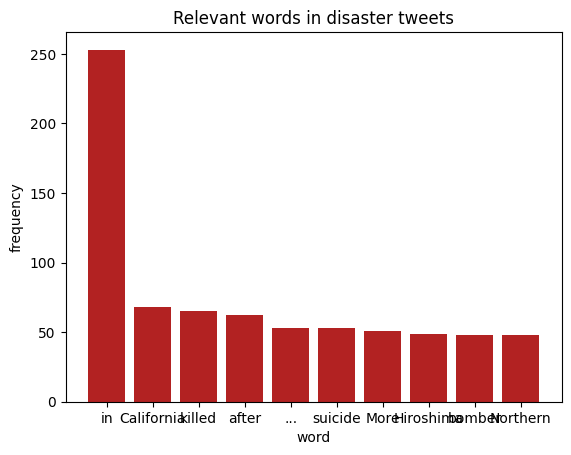

In [9]:
plot_relevant_words("Relevant words in disaster tweets", disaster_counter, non_disaster_counter, color="firebrick")

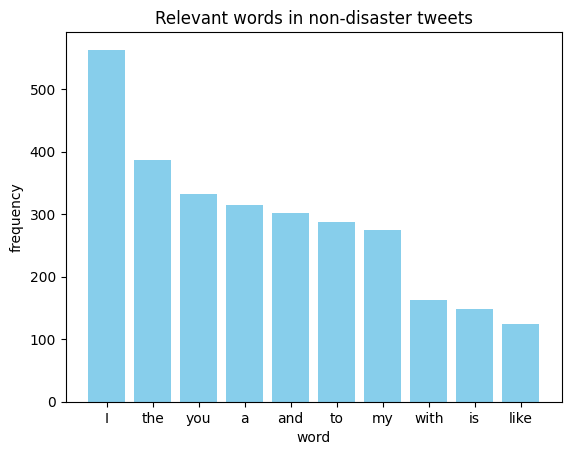

In [10]:
plot_relevant_words("Relevant words in non-disaster tweets", non_disaster_counter, disaster_counter)

The most relevant words for the disaster tweets make a lot of sense in relation to their classification, but non-disaster tweets are non-specific. This is possibly because non-disaster tweets can encompass any topic, which means they don't have certain words which are especially relevant to being "non-disaster tweets".

### Breakdown of Length of Disaster vs. Non-Disaster Tweets

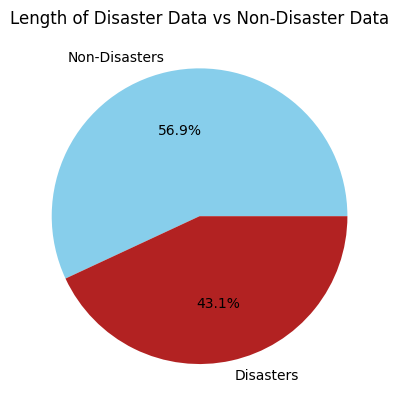

In [11]:
plt.pie([len(non_disaster_data), len(disaster_data)], labels = ['Non-Disasters', 'Disasters'], autopct='%1.1f%%', colors=["skyblue", "firebrick"])
plt.title('Length of Disaster Data vs Non-Disaster Data')
plt.show()

It looks like we have slightly more non-disaster tweets compared to disaster tweets, which could skew our model somehow if we're not careful.

### Breakdown of `keywords` in Disaster and Non-Disaster Tweets

In [12]:
Counter(train_data['keyword'].dropna())

Counter({'ablaze': 36,
         'accident': 35,
         'aftershock': 34,
         'airplane%20accident': 35,
         'ambulance': 38,
         'annihilated': 34,
         'annihilation': 29,
         'apocalypse': 32,
         'armageddon': 42,
         'army': 34,
         'arson': 32,
         'arsonist': 34,
         'attack': 36,
         'attacked': 35,
         'avalanche': 30,
         'battle': 26,
         'bioterror': 37,
         'bioterrorism': 30,
         'blaze': 38,
         'blazing': 34,
         'bleeding': 35,
         'blew%20up': 33,
         'blight': 32,
         'blizzard': 37,
         'blood': 35,
         'bloody': 35,
         'blown%20up': 33,
         'body%20bag': 33,
         'body%20bagging': 33,
         'body%20bags': 41,
         'bomb': 34,
         'bombed': 38,
         'bombing': 29,
         'bridge%20collapse': 35,
         'buildings%20burning': 35,
         'buildings%20on%20fire': 33,
         'burned': 33,
         'burning': 34,
      

In [13]:
Counter(train_data[train_data['target'] == 1]['keyword'].dropna())

Counter({'ablaze': 13,
         'accident': 24,
         'airplane%20accident': 30,
         'ambulance': 20,
         'annihilated': 11,
         'annihilation': 10,
         'apocalypse': 9,
         'armageddon': 5,
         'army': 5,
         'arson': 22,
         'arsonist': 8,
         'attack': 25,
         'attacked': 21,
         'avalanche': 4,
         'battle': 5,
         'bioterror': 22,
         'bioterrorism': 21,
         'blaze': 5,
         'blazing': 1,
         'bleeding': 5,
         'blew%20up': 2,
         'blight': 2,
         'blizzard': 4,
         'blood': 5,
         'bloody': 3,
         'blown%20up': 5,
         'body%20bag': 1,
         'body%20bagging': 5,
         'body%20bags': 1,
         'bomb': 15,
         'bombed': 19,
         'bombing': 27,
         'bridge%20collapse': 29,
         'buildings%20burning': 24,
         'buildings%20on%20fire': 28,
         'burned': 7,
         'burning': 10,
         'burning%20buildings': 21,
         'bush%2

In [14]:
Counter(train_data[train_data['target'] == 0]['keyword'].dropna())

Counter({'ablaze': 23,
         'accident': 11,
         'aftershock': 34,
         'airplane%20accident': 5,
         'ambulance': 18,
         'annihilated': 23,
         'annihilation': 19,
         'apocalypse': 23,
         'armageddon': 37,
         'army': 29,
         'arson': 10,
         'arsonist': 26,
         'attack': 11,
         'attacked': 14,
         'avalanche': 26,
         'battle': 21,
         'bioterror': 15,
         'bioterrorism': 9,
         'blaze': 33,
         'blazing': 33,
         'bleeding': 30,
         'blew%20up': 31,
         'blight': 30,
         'blizzard': 33,
         'blood': 30,
         'bloody': 32,
         'blown%20up': 28,
         'body%20bag': 32,
         'body%20bagging': 28,
         'body%20bags': 40,
         'bomb': 19,
         'bombed': 19,
         'bombing': 2,
         'bridge%20collapse': 6,
         'buildings%20burning': 11,
         'buildings%20on%20fire': 5,
         'burned': 26,
         'burning': 24,
         'b

Oddly enough - the key words in disaster and non-disaster tweets are similar. It's possible the keywords of this dataset are considered "sensitive" words, in which case they are relevant in both non-disaster and disaster tweets, but depending on the context can determine the classification of the example. In one instance 'lava' can be considered a keyword, but in the context of non-disaster tweets, 'lava lamp' could be a phrase and this would be no indication of a disaster tweet.

# Final Project - Models

In [15]:
def pad_data(sequences, max_length):
  # Keras has a convenient utility for padding a sequence.
  # Also make sure we get a numpy array rather than an array of lists.
  return np.array(list(
      tf.keras.preprocessing.sequence.pad_sequences(
          sequences, maxlen=max_length, padding='post', value=0)))

In [16]:
def get_vectorize_layer(train_X, max_vocab_size = 1000, max_tweet_length = 350):

  layer = tf.keras.layers.TextVectorization(
      max_tokens=max_vocab_size, # Maximum vocabulary size (None -> no cap)
      standardize='lower_and_strip_punctuation', # Standarization to apply to text (None -> no standarization)
      split='whitespace', # Values can be None (no splitting), "whitespace", or a Callable
      output_mode='int',  # Values can be "int", "multi_hot", "count" or "tf_idf"
      output_sequence_length=max_tweet_length, # Only valid in INT mode. If set, the output will have its time dimension padded or truncated to exactly output_sequence_length values
      )

  layer.adapt(train_X)

  return layer

In [17]:
def build_RNN(v_layer, embedding_dims=100, LSTM_units=[64, 32], max_tweet_length=350, custom_embeddings_layer=None):
  model = tf.keras.Sequential()

  model.add(v_layer)

  if not custom_embeddings_layer:
    model.add(tf.keras.layers.Embedding(input_dim=1000,
                                                output_dim=embedding_dims))
  else:
    model.add(custom_embeddings_layer)

  model.add(
      tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(LSTM_units[0], return_sequences=True))
  )
  model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(LSTM_units[1])))

  model.add(tf.keras.layers.Dense(10, activation='relu'))

  model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

  model.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

  return model

In [18]:
trainn = np.array(train_X)[:,0]

v_layer = get_vectorize_layer(trainn)
model = build_RNN(v_layer)

history = model.fit(
  x = train_X,  # our sparse padded training data
  y = train_Y,  # corresponding binary labels
  epochs=15,    # number of passes through the training data
  verbose=1     # display some progress output during training
  )



Epoch 1/15
 24/191 [==>...........................] - ETA: 43s - loss: 0.6865 - accuracy: 0.5625

KeyboardInterrupt: 

# Trying to improve the LSTM model with pre-trained embeddings

Following the instructions on keras website we can use the pre-trained GloVe embeddings to further improve our model:

In [ ]:
!wget https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
!unzip -q glove.6B.zip

Lets load the 200-dimensional embeddings:

In [ ]:
path_to_glove_file = "glove.6B.200d.txt"

embeddings_index = {}
with open(path_to_glove_file) as f:
    for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, "f", sep=" ")
        embeddings_index[word] = coefs

print("Found %s word vectors." % len(embeddings_index))

## Creating the embedding layer

In [ ]:
trainn = np.array(train_X)[:,0]
v_layer = get_vectorize_layer(trainn)

voc = v_layer.get_vocabulary()
word_index = dict(zip(voc, range(len(voc))))

num_tokens = len(voc) + 2
embedding_dim = 200
hits = 0
misses = 0

# Prepare embedding matrix
embedding_matrix = np.zeros((num_tokens, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # Words not found in embedding index will be all-zeros.
        # This includes the representation for "padding" and "OOV"
        embedding_matrix[i] = embedding_vector
        hits += 1
    else:
        misses += 1
print("Converted %d words (%d misses)" % (hits, misses))

In [ ]:
embedding_layer = tf.keras.layers.Embedding(
    num_tokens,
    embedding_dim,
    trainable=False,
)
embedding_layer.build((1,))
embedding_layer.set_weights([embedding_matrix])

In [ ]:
model = build_RNN_custom_embeddings(v_layer, custom_embeddings_layer=embedding_layer)

history = model.fit(
  x = train_X,  # our sparse padded training data
  y = train_Y,  # corresponding binary labels
  epochs=15,    # number of passes through the training data
  verbose=1     # display some progress output during training
  )